In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
sns.set()

In [2]:
df = pd.read_csv("nfl-elo/nfl_elo_latest.csv")

In [3]:
df.head()

,date,season,neutral,playoff,team1,team2,elo1_pre,elo2_pre,elo_prob1,elo_prob2,...,qbelo_prob1,qbelo_prob2,qb1_game_value,qb2_game_value,qb1_value_post,qb2_value_post,qbelo1_post,qbelo2_post,score1,score2
0,9/5/2019,2019,0,NaN,CHI,GB,1588.897931,1455.131370,0.758449,0.241551,...,0.640182,0.359818,-36.627083,74.729307,153.799734,179.824881,1532.560287,1547.089310,3.0,10.0
1,9/8/2019,2019,0,NaN,JAX,KC,1455.249073,1602.077427,0.384370,0.615630,...,0.415645,0.584355,88.354740,433.187480,163.488868,242.949378,1461.728341,1629.568396,26.0,40.0
2,9/8/2019,2019,0,NaN,CAR,LAR,1519.378772,1598.015666,0.480385,0.519615,...,0.475030,0.524970,49.375757,64.164228,164.522141,145.308064,1500.520997,1603.294491,27.0,30.0
3,9/8/2019,2019,0,NaN,MIN,ATL,1538.423954,1520.315825,0.617372,0.382628,...,0.592845,0.407155,127.861581,210.622686,170.578796,228.546720,1562.098920,1500.092161,28.0,12.0
4,9/8/2019,2019,0,NaN,MIA,BAL,1415.178762,1570.539249,0.372816,0.627184,...,0.387250,0.612750,21.076863,422.479782,146.838364,152.862017,1346.716851,1565.711613,10.0,59.0


## Mahomes

Mahomes = df.loc[(df["qb1"] == "Patrick Mahomes") | (df["qb2"] == "Patrick Mahomes")]

In [4]:
Mahomes1 = df.loc[df["qb1"] == "Patrick Mahomes"]
Mahomes2 = df.loc[df["qb2"] == "Patrick Mahomes"]

In [5]:
Mahomes1["qb1_game_value"]

37     416.952636
76     136.977356
85     168.827079
188    154.611932
211    278.961303
243    131.774178
262    438.446626
264    401.937351
266           NaN
Name: qb1_game_value, dtype: float64

In [6]:
Mahomes2["qb1_game_value"]

1       88.354740
27      31.103294
56     243.742491
92     -65.195637
136    171.385811
161     -5.187189
205     37.476330
238     41.313655
Name: qb1_game_value, dtype: float64

In [7]:
mahomesQbScore1 = Mahomes1[["date","qb1_value_pre","qb1_value_post","qb1_game_value","qbelo_prob1","qbelo1_post"]]
mahomesQbScore2 = Mahomes2[["date","qb2_value_pre","qb2_value_post","qb2_game_value","qbelo_prob2","qbelo2_post"]]
mahomesQbScore1.columns = ["date","qb_value_pre","qb_value_post","qb_game_value","qbelo_prob","qbelo_post"]
mahomesQbScore2.columns = ["date","qb_value_pre","qb_value_post","qb_game_value","qbelo_prob","qbelo_post"]

In [8]:
mahomesQbScore = pd.concat([mahomesQbScore1,mahomesQbScore2],sort=False).sort_values("date")

In [9]:
mahomesQbScore.head()

,date,qb_value_pre,qb_value_post,qb_game_value,qbelo_prob,qbelo_post
262,1/12/2020,245.735426,265.006546,438.446626,0.826138,1703.995494
264,1/19/2020,265.006546,278.699627,401.937351,0.693796,1718.290032
85,10/13/2019,262.953471,253.540832,168.827079,0.701878,1599.073256
92,10/17/2019,253.540832,244.117918,159.311692,0.635070,1621.581832
76,10/6/2019,276.950817,262.953471,136.977356,0.823315,1630.380277


## Garoppolo

In [10]:
Garoppolo = df.loc[(df["qb1"] == "Jimmy Garoppolo") | (df["qb2"] == "Jimmy Garoppolo")]

In [11]:
Garoppolo.head()

,date,season,neutral,playoff,team1,team2,elo1_pre,elo2_pre,elo_prob1,elo_prob2,...,qbelo_prob1,qbelo_prob2,qb1_game_value,qb2_game_value,qb1_value_post,qb2_value_post,qbelo1_post,qbelo2_post,score1,score2
10,9/8/2019,2019,0,NaN,TB,SF,1444.772669,1422.631825,0.622841,0.377159,...,0.545569,0.454431,-75.782122,68.893159,145.944115,134.650411,1413.887149,1508.870560,17.0,31.0
24,9/15/2019,2019,0,NaN,CIN,SF,1425.507827,1457.756782,0.546993,0.453007,...,0.466439,0.533561,135.873275,277.101753,139.900640,148.895545,1382.110291,1538.583339,17.0,41.0
44,9/22/2019,2019,0,NaN,SF,PIT,1493.503009,1538.911743,0.528164,0.471836,...,0.786794,0.213206,121.493001,80.205903,146.155291,79.026162,1544.804736,1516.924959,24.0,20.0
77,10/7/2019,2019,0,NaN,SF,CLE,1508.556760,1488.359751,0.620209,0.379791,...,0.632157,0.367843,154.530466,-190.808101,146.992808,107.985857,1568.561683,1500.450003,31.0,3.0
87,10/13/2019,2019,0,NaN,LAR,SF,1589.309361,1533.180585,0.667583,0.332417,...,0.616576,0.383424,-51.941405,158.957585,147.133474,148.189286,1552.113732,1602.373539,7.0,20.0


In [12]:
Garoppolo1 = df.loc[df["qb1"] == "Jimmy Garoppolo"]
Garoppolo2 = df.loc[df["qb2"] == "Jimmy Garoppolo"]

In [13]:
garoppoloQbScore1 = Garoppolo1[["date","qb1_value_pre","qb1_value_post","qb1_game_value","qbelo_prob1","qbelo1_post"]]
garoppoloQbScore2 = Garoppolo2[["date","qb2_value_pre","qb2_value_post","qb2_game_value","qbelo_prob2","qbelo2_post"]]
garoppoloQbScore1.columns = ["date","qb_value_pre","qb_value_post","qb_game_value","qbelo_prob","qbelo_post"]
garoppoloQbScore2.columns = ["date","qb_value_pre","qb_value_post","qb_game_value","qbelo_prob","qbelo_post"]

In [14]:
garoppoloQbScore = pd.concat([garoppoloQbScore1,garoppoloQbScore2],sort=False).sort_values("date")

In [15]:
garoppoloQbScore.head()

,date,qb_value_pre,qb_value_post,qb_game_value,qbelo_prob,qbelo_post
260,1/11/2020,152.401767,141.312649,41.510583,0.674369,1658.178853
265,1/19/2020,141.312649,132.618259,54.368746,0.638694,1678.165910
87,10/13/2019,146.992808,148.189286,158.957585,0.383424,1602.373539
99,10/20/2019,148.189286,133.814639,4.442812,0.751399,1612.902425
116,10/27/2019,133.814639,134.718243,142.850689,0.735571,1630.829242


## Process

We now have mahomesQbScore and garoppoloQbScore

In [16]:
mahomesQbScore.head()

,date,qb_value_pre,qb_value_post,qb_game_value,qbelo_prob,qbelo_post
262,1/12/2020,245.735426,265.006546,438.446626,0.826138,1703.995494
264,1/19/2020,265.006546,278.699627,401.937351,0.693796,1718.290032
85,10/13/2019,262.953471,253.540832,168.827079,0.701878,1599.073256
92,10/17/2019,253.540832,244.117918,159.311692,0.635070,1621.581832
76,10/6/2019,276.950817,262.953471,136.977356,0.823315,1630.380277


[Text(0, 0, '1/12/2020'),
 Text(0, 0, '1/19/2020'),
 Text(0, 0, '10/13/2019'),
 Text(0, 0, '10/17/2019'),
 Text(0, 0, '10/6/2019'),
 Text(0, 0, '11/10/2019'),
 Text(0, 0, '11/18/2019'),
 Text(0, 0, '12/1/2019'),
 Text(0, 0, '12/15/2019'),
 Text(0, 0, '12/22/2019'),
 Text(0, 0, '12/29/2019'),
 Text(0, 0, '12/8/2019'),
 Text(0, 0, '2/2/2020'),
 Text(0, 0, '9/15/2019'),
 Text(0, 0, '9/22/2019'),
 Text(0, 0, '9/29/2019')]

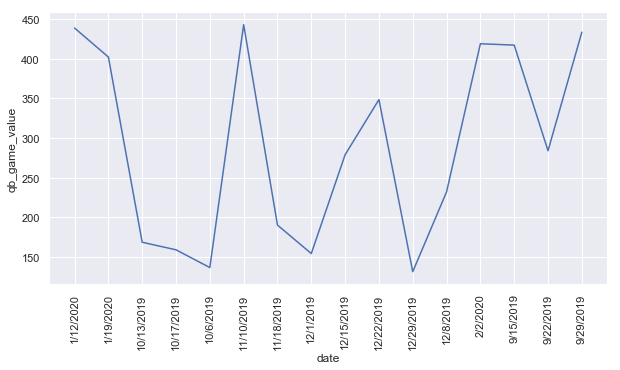

In [17]:
plt.figure(figsize=(10,5))

ax = sns.lineplot(x="date", y="qb_game_value", data=mahomesQbScore)
#ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
ax.set_xticklabels(mahomesQbScore["date"],rotation=90)



[Text(0, 0, '1/11/2020'),
 Text(0, 0, '1/19/2020'),
 Text(0, 0, '10/13/2019'),
 Text(0, 0, '10/20/2019'),
 Text(0, 0, '10/27/2019'),
 Text(0, 0, '10/31/2019'),
 Text(0, 0, '10/7/2019'),
 Text(0, 0, '11/11/2019'),
 Text(0, 0, '11/17/2019'),
 Text(0, 0, '11/24/2019'),
 Text(0, 0, '12/1/2019'),
 Text(0, 0, '12/15/2019'),
 Text(0, 0, '12/21/2019'),
 Text(0, 0, '12/29/2019'),
 Text(0, 0, '12/8/2019'),
 Text(0, 0, '2/2/2020'),
 Text(0, 0, '9/15/2019'),
 Text(0, 0, '9/22/2019')]

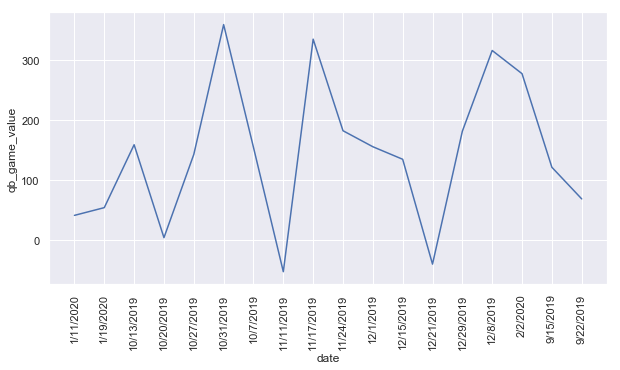

In [18]:
plt.figure(figsize=(10,5))
ax = sns.lineplot(x="date", y="qb_game_value", data=garoppoloQbScore)
#ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
ax.set_xticklabels(garoppoloQbScore["date"],rotation=90)

## Now let's try combining them

In [19]:
mahomesQbScore["player"] = "Patrick Mahomes"
garoppoloQbScore["player"] = "Jimmy Garoppolo"

In [20]:
qbScores = pd.concat([mahomesQbScore,garoppoloQbScore])

In [24]:
a = qbScores["date"][1] 
dt_obj = datetime.strptime(a, '%m/%d/%Y')
print(dt_obj.day)

8


In [25]:
def dateToGameWeek(date):
    month = date.month
    year = date.year
    day = date.day
    if month == 9 and day >= 5 and day <= 9:
        week = 1
    elif month == 9 and day >=12 and day <= 15:
        week = 2
    elif month == 9 and day >=19 and day <= 23:
        week = 3
    elif month == 9 and day >= 26 and day <= 30:
        week = 4
    elif month == 10 and day >= 2 and day <= 7:
        week = 5
    elif month == 10 and day >= 10 and day <= 14:
        week = 6
    elif month == 10 and day >= 17 and day <= 21:
        week = 7
    elif month == 10 and day >=24 and day <= 28:
        week = 8
    elif (month == 10 or month == 11) and (day == 31 or day == 3 or day == 4):
        week = 9
    elif month == 11 and day >= 7 and day <= 11:
        week = 10
    elif month == 11 and day >= 14 and day <= 18:
        week = 11
    elif month == 11 and day >= 21 and day <= 25:
        week = 12
    elif (month == 11 or month == 12) and (day == 28 or day == 1 or day == 2):
        week = 13
    elif month == 12 and day >= 5 and day <= 9:
        week = 14
    elif month == 12 and day >= 12 and day <= 15:
        week = 15
    elif month == 12 and day >= 21 and day <= 23:
        week = 16
    elif month == 12 and day == 29:
        week = 17
    elif month == 1 and day >= 4 and day <= 5:
        week = 18
    elif month == 1 and day >= 11 and day <= 12:
        week = 19
    elif month == 1 and day == 19:
        week = 20
    elif month == 2 and day == 2:
        week = 21
    else:
        week = "Error"
        print(date)
    return(week)

In [28]:
gameWeeks = []
for index, row in qbScores.iterrows():
    date = datetime.strptime(row["date"], '%m/%d/%Y')
    week = dateToGameWeek(date)
    gameWeeks.append(week)
    
    

In [29]:
qbScores["week"] = gameWeeks

In [33]:
qbScores = qbScores.sort_values("week")

In [34]:
qbScores.to_csv("qbScores.csv")

Text(0.5, 1.0, 'Game Value of Superbowl Quarterbacks Over the Season and Post-Season')

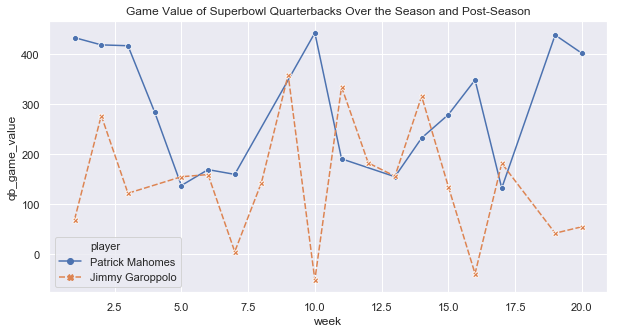

In [31]:
plt.figure(figsize=(10,5))
ax = sns.lineplot(x="week", y="qb_game_value", data=qbScores,hue = "player",style="player",markers=True)
#ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
#ax.set_xticklabels(ax.get_xticklabels())
ax.set_title("ELO of Superbowl Quarterbacks Over the Season and Post-Season")

In [ ]:
sns.lmplot(x="week", y="qb_game_value", hue="player", data=qbScores);